# *Density Matrices and Path Integrals*

`Doruk Efe Gökmen -- 14/08/2018 -- Ankara`

## Stationary states of the quantum harmonic oscillator

The 1-dimensional (1D) quantum mechanical harmonic oscillator with characteristic frequency $\omega$ is described by the same potential energy as its classical counterpart acting on a mass $m$: $V(x)=\frac{1}{2}m\omega^2x^2$. The physical structure of the allowed states subjected to this potential is governed by the time independent Schrödinger equation (TISE) $\mathcal{H}\psi=\left(-\frac{\hbar^2}{2m}\frac{\text{d}^2}{\text{d}x^2}+\frac{1}{2}m\omega^2x^2\right)\psi=E\psi$, where $E$ is an energy eigenvalue. Note that here we have taken $\hbar=1$, $m=1$, $\omega=1$ for simplicity. The stationary states $\psi_n(x)$ (Hermite polynomials) and the corresponding energy eigenvalues $E_n$ are calculated by the following program.

Populating the interactive namespace from numpy and matplotlib


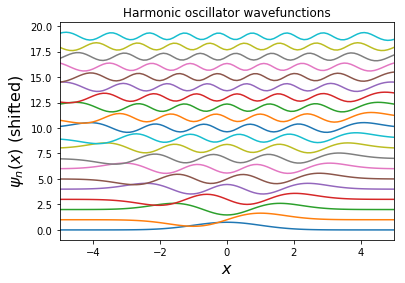

In [1]:
%pylab inline
import math, pylab

n_states = 20 #number of stationary states to be plotted
grid_x = [i * 0.1 for i in range(-50, 51)] #define the x-grid
psi = {} #intialise the list of stationary states
for x in grid_x:
    psi[x] = [math.exp(-x ** 2 / 2.0) / math.pi ** 0.25]  # ground state
    psi[x].append(math.sqrt(2.0) * x * psi[x][0])         # first excited state
    # other excited states (through Hermite polynomial recursion relations):
    for n in range(2, n_states): 
        psi[x].append(math.sqrt(2.0 / n) * x * psi[x][n - 1] -
                      math.sqrt((n - 1.0) / n) * psi[x][n - 2])

# graphics output
for n in range(n_states):
    shifted_psi = [psi[x][n] + n  for x in grid_x]  # vertical shift
    pylab.plot(grid_x, shifted_psi)
pylab.title('Harmonic oscillator wavefunctions')
pylab.xlabel('$x$', fontsize=16)
pylab.ylabel('$\psi_n(x)$ (shifted)', fontsize=16)
pylab.xlim(-5.0, 5.0)
pylab.savefig('plot-harmonic_wavefunction.png')
pylab.show()

The following section checks whether the above results are correct (normalisation, ortanormality and TISE). TISE condition is verified by a discrete appoximation of the second derivative.

In [ ]:
import math

def orthonormality_check(n, m):
    integral_n_m = sum(psi[n][i] * psi[m][i] for i in range(nx)) * dx
    return integral_n_m

nx = 1000
L = 10.0
dx = L / (nx - 1)
x = [- L / 2.0 + i * dx for i in range(nx)]
n_states = 4
psi = [[math.exp(-x[i] ** 2 / 2.0) / math.pi ** 0.25 for i in range(nx)]]  
psi.append([math.sqrt(2.0) * x[i] * psi[0][i] for i in range(nx)])         
for n in range(2, n_states):
    psi.append([math.sqrt(2.0 / n) * x[i] * psi[n - 1][i] - \
                math.sqrt((n - 1.0) / n) * psi[n - 2][i] for i in range(nx)])
n = n_states - 1
print 'checking energy level', n
#discrete approximation for the second derivative
H_psi = [0.0] +  [(- 0.5 * (psi[n][i + 1] - 2.0 * psi[n][i] + psi[n][i - 1]) /
          dx ** 2 + 0.5 * x[i] ** 2 * psi[n][i]) for i in range(1, nx - 1)]
for i in range(1, nx - 1):  
    print n, x[i],  H_psi[i] / psi[n][i]

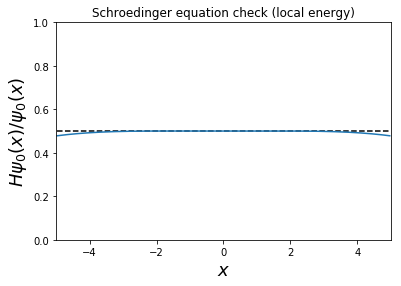

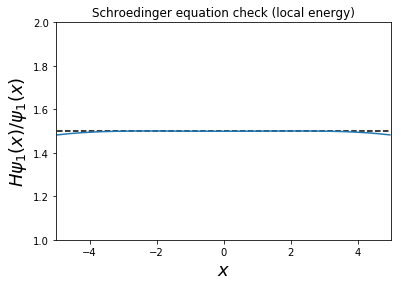

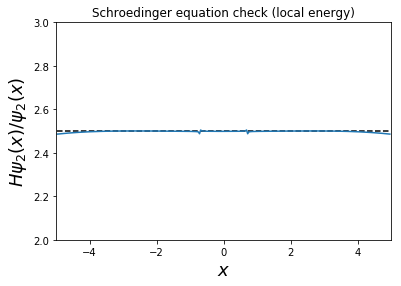

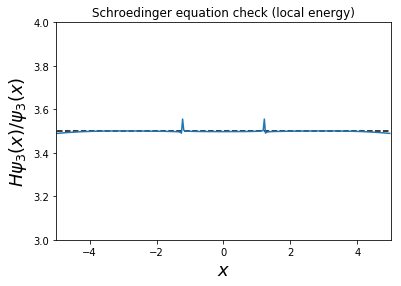

In [8]:
import math, pylab

nx = 300  # nx is even, to avoid division by zero
L = 10.0
dx = L / (nx - 1)
x = [- L / 2.0 + i * dx for i in range(nx)]
# construct wavefunctions:
n_states = 4
psi = [[math.exp(-x[i] ** 2 / 2.0) / math.pi ** 0.25 for i in range(nx)]]  # ground state
psi.append([math.sqrt(2.0) * x[i] * psi[0][i] for i in range(nx)])         # first excited state
for n in range(2, n_states):
    psi.append([math.sqrt(2.0 / n) * x[i] * psi[n - 1][i] - \
                math.sqrt((n - 1.0) / n) * psi[n - 2][i] for i in range(nx)])
# local energy check:
H_psi_over_psi = []
for n in range(n_states):
    H_psi = [(- 0.5 * (psi[n][i + 1] - 2.0 * psi[n][i] + psi[n][i - 1])
             / dx ** 2 + 0.5 * x[i] ** 2 * psi[n][i]) for i in range(1, nx - 1)]
    H_psi_over_psi.append([H_psi[i] / psi[n][i+1] for i in range(nx - 2)])

# graphics output:
for n in range(n_states):
    pylab.plot(x[1:-1], [n + 0.5 for i in x[1:-1]], 'k--', lw=1.5)
    pylab.plot(x[1:-1], H_psi_over_psi[n], '-', lw=1.5)
    pylab.xlabel('$x$', fontsize=18)
    pylab.ylabel('$H \psi_%i(x)/\psi_%i(x)$' % (n, n), fontsize=18)
    pylab.xlim(x[0], x[-1])
    pylab.ylim(n, n + 1)
    pylab.title('Schroedinger equation check (local energy)')
    #pylab.savefig('plot-check_schroedinger_energy-%i.png' % n)
    pylab.show()

## Quantum statistical mechanics - Density matrices

In a thermal ensemble, the probability of being in $n$th energy eigenstate is given by the Boltzmann factor $\pi(n)\propto e^{-\beta E_n}$, where $\beta=\frac{1}{k_BT}$. Hence, e.g the probability $\pi(x,n)$ to be in state $n$ and in position $x$ is proportional to $e^{-\beta E_n}|\psi_n(x)|^2$.

We can consider the diagonal density matrix $\rho(x,x,\beta)=\sum_n e^{\beta E_n}\psi_n(x)\psi_n^*(x)$, which is the probability $\pi(x)$ of being at position $x$. This is a special case of the more general density matrix $\rho(x,x',\beta)=\sum_n e^{\beta E_n}\psi_n(x)\psi_n^*(x')$, which is the central object of quantum statistical mechanics. The partition function is given by $Z(\beta)=\text{Tr}\rho_u=\int_{-\infty}^\infty \rho_u(x,x,\beta)\text{d}x$, where $\rho_u=e^{-\beta \mathcal{H}}$ is the unnormalised density matrix. It follows that $\rho(\beta)=\frac{e^{-\beta\mathcal{H}}}{\text{Tr}(e^{-\beta\mathcal{H}})}$.

Properties of the density matrix:
* *The convolution property*: $\int \rho(x,x',\beta_1) \rho(x',x'',\beta_2) \text{d}x' = \int \text{d}x' \sum_{n,m} \psi_n(x)e^{-\beta_1 E_n} \psi_n^*(x')\psi_m(x')e^{-\beta_2 E_m}\psi_m^*(x'')$ $ = \sum_{n,m} \psi_n(x)e^{-\beta_1 E_n} \int \text{d}x' \psi_n^*(x')\psi_m(x')e^{-\beta_2 E_m}\psi_m^*(x'') = \sum_n \psi_n(x)e^{-(\beta_1+\beta_2)E_n}\psi_n^*(x'')=\rho(x,x'',\beta_1+\beta_2)$ $\implies \boxed{ \int \rho(x,x',\beta) \rho(x',x'',\beta) \text{d}x' = \rho(x,x'',2\beta)}$ (note that in the discrete case, this is just matrix squaring). **So, if we have the density matrix at temperature $T=k_B/\beta$ this equation allows us to compute the density matrix at temperature $T/2$**.

* *The free density matrix* for a system of infinte size is $\rho^\text{free}(x,x',\beta)=\frac{1}{\sqrt{2\pi\beta}}\exp{\left[-\frac{(x-x')^2}{2\beta}\right]}$. Notice that in the high temperature limit ($\beta\rightarrow 0$) the density matrix becomes classical: $\rho^\text{free}\rightarrow \delta(x-x')$. The quantum system exihibits its peculiar properties more visibly at low temperatures.

* *High temperature limit and the Trotter decomposition*. In general any Hamiltonian can be written as $\mathcal{H}=\mathcal{H}^\text{free}+V(x)$. At high temperatures ($\beta\rightarrow 0$) we can approximate the density matrix as $\rho(x,x',\beta)=e^{-\beta V(x)/2}\rho^\text{free}e^{-\beta V(x')/2}$ (Trotter expansion). Hence an explicit expression for the density matrix is available without solving the Schrödinger (or more preciesly Liouville) equation for any potential.

Getting the density matrix for the harmonic oscillator at high temperatures by the Trotter decomposition.

Populating the interactive namespace from numpy and matplotlib


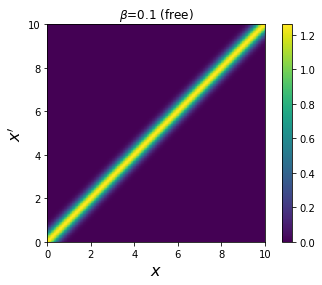

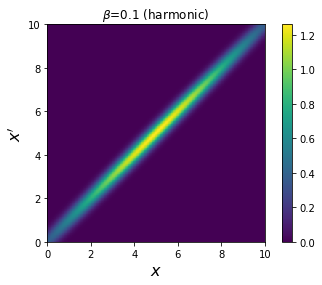

In [17]:
%pylab inline
import math, pylab

# density matrix for a free particle (exact)
def funct_rho_free(x, xp, beta):
    return (math.exp(-(x - xp) ** 2 / (2.0 * beta)) /
            math.sqrt(2.0 * math.pi * beta))

beta = 0.1
nx = 300
L = 10.0
x = [-L / 2.0 + i * L / float(nx - 1) for i in range(nx)]
rho_free, rho_harm = [], []
for i in range(nx):
    rho_free.append([funct_rho_free(x[i], x[j], beta) for j in range(nx)])
    rho_harm.append([rho_free[i][j] * math.exp(- beta * x[i] ** 2 / 4.0 -
                     beta * x[j] ** 2 / 4.0) for j in range(nx)])

# graphics output (free particle)
pylab.imshow(rho_free, extent=[0.0, L, 0.0, L], origin='lower')
pylab.xlabel('$x$', fontsize=16)
pylab.ylabel('$x\'$', fontsize=16)
pylab.colorbar()
pylab.title('$\\beta$=%s (free)' % beta)
pylab.savefig('plot-trotter-free.png')
pylab.show()

# graphics output (harmonic potential)
pylab.imshow(rho_harm, extent=[0.0, L, 0.0, L], origin='lower')
pylab.xlabel('$x$', fontsize=16)
pylab.ylabel('$x\'$', fontsize=16)
pylab.colorbar()
pylab.title('$\\beta$=%s (harmonic)' % beta)
pylab.savefig('plot-trotter-harmonic.png')

So, at high temperature, the density matrix is given by a simple correction to the free density matrix as seen above. Taking $\rho^\text{free}$ as a starting point, by the convolution property we can obtain the density matrix at low temperatures too, hence leading to a convenient numerical scheme through matrix squaring. The following section contains an implementation of this.

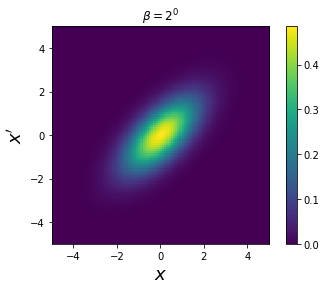

In [2]:
import math, numpy, pylab

#matrix squaring and convolution to calculate the density matrix at any temperature.

# Free off-diagonal density matrix
def rho_free(x, xp, beta):
    return (math.exp(-(x - xp) ** 2 / (2.0 * beta)) /
            math.sqrt(2.0 * math.pi * beta))

# Harmonic density matrix in the Trotter approximation (returns the full matrix)
def rho_harmonic_trotter(grid, beta):
    return numpy.array([[rho_free(x, xp, beta) * \
                         numpy.exp(-0.5 * beta * 0.5 * (x ** 2 + xp ** 2)) \
                         for x in grid] for xp in grid])

#construct the position grid
x_max = 5.0 #maximum position value on the grid
nx = 100 #number of grid elements
dx = 2.0 * x_max / (nx - 1) #the grid spacing
x = [i * dx for i in range(-(nx - 1) / 2, nx / 2 + 1)] #the position grid

beta_tmp = 2.0 ** (-8)                   # initial value of beta (power of 2)
beta     = 2.0 ** 0                      # actual value of beta (power of 2)
rho = rho_harmonic_trotter(x, beta_tmp)  # density matrix at initial beta

#reduce the temperature in log_2 steps by the convolution property (matrix squaring) 
#and get the updated density matrix rho
while beta_tmp < beta:
    rho = numpy.dot(rho, rho) #matrix squaring is implemented by the dot product in numpy
    rho *= dx  #multiply by the position differential since we are in the position representation
    beta_tmp *= 2.0 #reduce the temperute by a factor of 2

# graphics output
pylab.imshow(rho, extent=[-x_max, x_max, -x_max, x_max], origin='lower')
pylab.colorbar()
pylab.title('$\\beta = 2^{%i}$' % math.log(beta, 2))
pylab.xlabel('$x$', fontsize=18)
pylab.ylabel('$x\'$', fontsize=18)
pylab.savefig('plot-harmonic-rho.png')

### $\rho^\text{free}$ with periodic boundary conditions

Free density matrix in periodic boundary conditions (periodic box of size $L$) can be obtained by the *Poisson sum rule?* by $\rho^\text{per}(x,x',\beta)=\frac{1}{L}\sum^\infty_{n=-\infty}e^{i\frac{2\pi n (x-x')}{L}}e^{-\beta\frac{2\pi^2 n^2}{L^2}}=\sum^\infty_{w=-\infty}\rho^\text{free}(x,x'+wL,\beta)$, where $w$ is the *winding number* (that is the winding around the box of size L). The diagonal stripe is a manifestation of the fact that the system is translation invariant, i.e. $\rho^\text{free}(x,x',\beta)$ is a function of $x-x'$.

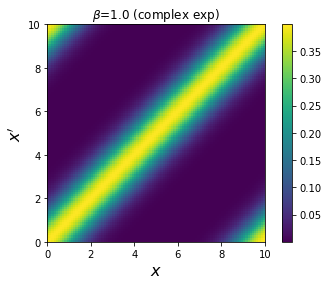

In [3]:
import math, cmath, pylab

ntot = 21   # odd number
beta = 1.0 #inverse temperature
nx = 100 #number of grid elements
L = 10.0 #length of the system
x = [i * L / float(nx - 1) for i in range(nx)] #position grid
rho_complex = []
for i in range(nx):
    rho_complex.append([sum(
              math.exp(- 2.0 * beta * (math.pi * n / L) ** 2) *
              cmath.exp(1j * 2.0 * n * math.pi * (x[i] - x[j]) / L) / L
              for n in range(-(ntot - 1) / 2, (ntot + 1) / 2))
              for j in range(nx)]) #append the i'th line to the density matrix
    #(j loop is for constructing the line)
    
rho_real = [[rho_complex[i][j].real for i in range(nx)] for j in range(nx)]

# graphics output
pylab.imshow(rho_real, extent=[0.0, L, 0.0, L], origin='lower')
pylab.colorbar()
pylab.title('$\\beta$=%s (complex exp)' % beta)
pylab.xlabel('$x$', fontsize=16)
pylab.ylabel('$x\'$', fontsize=16)
pylab.savefig('plot-periodic-complex.png')

## Path integrals - Quantum Monte Carlo

### Path integral representation of the kernel

The kernel $K$ is the matrix element of the unitary time evolution operator $U(t_i-t_f)=e^{-i/\hbar(t_f-t_i)\mathcal{H}}$ in the position representation: $K(x_i,x_f;t_f-t_i)=\langle x_f  \left| U(t_f-t_i) \right| x_i \rangle$. We can write $K(x_i,x_f;t_f-t_i)=\langle x_f  \left| U^N((t_f-t_i)/N) \right| x_i \rangle$, that is, divide the time interval $[t_i,t_f]$ into $N$ equal intervals $[t_k,t_{k+1}]$ of length $\epsilon$, where $\epsilon=t_{k+1}-t_k=(t_f-t_i)/N$.

Then we can insert $N-1$ resolutions of identity ($\int_{-\infty}^\infty \text{d} x_k \left|x_k\rangle\langle x_k\right|$) to obtain

$K(x_i,x_f;t_f-t_i)= \left[\Pi_{k=1}^{N-1}\int_{-\infty}^\infty dx_k \right] \left[\Pi_{k=0}^{N-1} K(x_i,x_f;\epsilon = (t_f-t_i)/N)\right]$,

where $x_f=x_N$ and $x_i=x_0$. In the continuous limit, we would have 

$K(x_i,x_f;t_f-t_i)= \lim_{N\rightarrow\infty} \left[\Pi_{k=1}^{N-1}\int_{-\infty}^\infty dx_k \right] \left[\Pi_{k=0}^{N-1} K(x_i,x_f;\epsilon = (t_f-t_i)/N)\right]$. (A)

Let us now consider the limit $\epsilon\rightarrow 0$ ($N\rightarrow \infty$) to obtain the short time kernel $K(x_i,x_f;\epsilon)$ and thereby switching from discrete to the continuous limit. It is known that for small $\epsilon$ the Trotter formula implies that to a very good approximation 

$K(x_i,x_f;\epsilon = (t_f-t_i)/N) \simeq \langle x_{k+1}  \left| e^{-i(\hbar\epsilon T} e^{-i/\hbar \epsilon V} \right| x_k\rangle$,

which becomes exact as $\epsilon\rightarrow 0$. If we insert resolution of identity $\int \text{d}p_k \left| p_k \rangle\langle p_k \right|$, we get

$K(x_i,x_f;\epsilon) = \int_{-\infty}^\infty \text{d}p_k \langle x_{k+1}  \left| e^{-i(\hbar\epsilon T} \left| p_k \rangle\langle p_k \right| e^{-i/\hbar \epsilon V} \right| x_k\rangle = \int_{-\infty}^\infty \text{d}p_k \langle x_{k+1}  \left| p_k \rangle\langle p_k \right| x_k\rangle e^{-i/\hbar \epsilon \left(\frac{p_k}{2m} + V(x)\right)}$

$\implies K(x_i,x_f;\epsilon) = \frac{1}{2\pi \hbar}\int_{-\infty}^\infty \text{d}p_k e^{i/\hbar \epsilon \left[p_k\frac{x_{k+1}-x_k}{\epsilon}-\mathcal{H}(p_k,x_k) \right]}$. (B)

Hence, inserting (B) into (A) we get

$K(x_i,x_f;t_f-t_i) = \lim_{N\rightarrow \infty}\left[\Pi_{k=1}^{N-1}\int_{-\infty}^\infty dx_k \right] \left \{ \Pi_{k=0}^{N-1} \int_{-\infty}^\infty \text{d}p_k e^{i/\hbar \epsilon \left[p_k\frac{x_{k+1}-x_k}{\epsilon}-\mathcal{H}(p_k,x_k) \right]} \right\}$. (C)

We can simplify the exponent of the integrand in the limiting case $N\rightarrow \infty$, 

$\lim_{N\rightarrow \infty} \epsilon \sum_{k=0}^{N-1}\left[p_k\frac{x_{k+1}-x_k}{\epsilon}-\mathcal{H}(p_k,x_k) \right] =\int_{t_1}^{t_2}\text{d}t[p(t)\dot{x}(t)-\mathcal{H}[p(t),x(t)]]$

$=\int_{t_1}^{t_2}\text{d}t \mathcal{L}[x(t),\dot{x}(t)] = \mathcal{S}[x(t);t_f,t_i]$, (D)

where $\mathcal{L}[x(t),\dot{x}(t)] = \frac{m}{2}\dot{x}(t)^2-V[x(t)]$ is the Lagrangian and $\mathcal{S}[x(t);t_f,t_i]$ is the action between times $t_f$ and $t_i$.

Furthermore we can introduce the following notation for the integrals over *paths*:

$\lim_{N\rightarrow \infty}\left(\Pi_{k=1}^{N-1} \int_{-\infty}^\infty \text{d}x_k\right)=\int_{x(t_i)=x_i}^{x(t_f)=x_f}\mathcal{D}[x(t)]$, (E.1)

$\lim_{N\rightarrow \infty}\left(\Pi_{k=1}^{N-1}\int_{-\infty}^\infty\frac{\text{d}p_k}{2\pi\hbar}\right) =\int \mathcal{D}\left[\frac{p(t)}{2\pi\hbar}\right]$. (E.2)

Using (D) and (E) in (C), we get the path integral representation of the kernel

$K(x_i,x_f;t_f-t_i)= \int_{x(t_i)=x_i}^{x(t_f)=x_f}\mathcal{D}[x(t)] \int \mathcal{D}\left[\frac{p(t)}{2\pi\hbar}\right] e^{i/\hbar \mathcal{S}[x(t)]}$

$\implies \boxed{K(x_i,x_f;t_f-t_i)= \mathcal{N} \int_{x(t_i)=x_i}^{x(t_f)=x_f}\mathcal{D}[x(t)] e^{i/\hbar \mathcal{S}[x(t)]}}$, (F)

where $\mathcal{N}$ is the normalisation factor.

Here we see that each path has a phase proportional to the action. The equation (F) implies that we sum over all paths, which in fact interfere with one another. The true quantum mechanical amplitude is determined by the constructive and destructive interferences between these paths. For example, actions that are very large compared to $\hbar$, lead to very different phases even between nearby paths that differ only slightly, and that causes destructive interference between them. Only in the extremely close vicinity of the classical path $\bar x(t)$, where the action changes little when the phase varies, will neighbouring paths contirbute to the interference constructively. This leads to a classical deterministic path $\bar x(t)$, and this is why the classical approximation is valid when the action is very large compared to $\hbar$. Hence we see how the classical laws of motion arise from quantum mechanics.

### Path integral representation of the partition function
**Heuristic derivation of the discrete case:** Recall the convolution property of the density matrix, we can apply it repeatedly:

$\rho(x_0,x_2,\beta) = \int \rho(x_0,x_2,\beta/2) \rho(x_2,x_1,\beta/2) \text{d}x_2  = \int \int \int \rho(x_0,x_3,\beta/4) \rho(x_3, x_2,\beta/4) \rho(x_2,x_4,\beta/4) \rho(x_4,x_1 ,\beta/4) \text{d}x_2 \text{d}x_3 \text{d}x_4 = \cdots $ 

In other words: $\rho(x_0,x_N,\beta) = \int\int \cdots \int  \text{d}x_1 \text{d}x_2 \cdots \text{d}x_{N-1}\rho(x_0,x_1,\beta/N)\rho(x_1,x_2,\beta/N)\cdots\rho(x_{N-1},x_N,\beta/N)$. The variables $x_k$ in this integral is called a *path*. We can imagine the variable $x_k$ to be at position $x_k$ at given slice $k\beta/N$ of an imaginary time variable $\tau$ that goes from $0$ to $\beta$ in steps of $\Delta\tau=\beta/N$. Density matrices and partition functions can thus be expressed as multiple integrals over path variables, which are none other than the path integrals that were introduced in the previous subsection.

Given the unnormalised density matrix $\rho_u$, the discrete partition $Z_d(\beta)$ function can be written as a path integral for all ***closed*** paths (because of the trace property), i.e., paths with the same beginning and end points ($x_0=x_N$), over a “time” interval $−i\hbar\beta$.

$Z_d(\beta)= \text{Tr}(e^{-\beta \mathcal{H}}) = \text{Tr}(\rho_u(x_0,x_N,\beta) )=\int \text{d}x_0 \rho_u (x_0,x_N=x_0,\beta) $ $ = \int \int\int \cdots \int  \text{d}x_0 \text{d}x_1 \text{d}x_2 \cdots \text{d}x_{N-1}\rho_u(x_0,x_1,\beta/N)\rho_u(x_1,x_2,\beta/N)\cdots\rho_u(x_{N-1},x_N,\beta/N)\rho_u(x_{N-1},x_0,\beta/N)$. 

The integrand is the probabilistic weight $\Phi\left[\{x_i\}\right]$ of the discrete path consisting of points $\{x_i\}$. The continuous case can be obtained by taking the limit $N\rightarrow \infty$. By defining

$\Phi[x(\tau)] = \lim_{N\rightarrow \infty} \rho_u(x_0,x_1,\beta/N)\cdots \rho_u(x_{N-1},x_N,\beta/N)$, (G)

(note that this is the probability weight of a particular continuous path), and by using (E.1), we can express the continuous partition function $Z(\beta)$ as

$Z(\beta) = \int_{x(0)}^{x(\hbar \beta)=x(0)}\mathcal{D}[x(\tau)] \Phi[x(\tau)]$. (H)

But what is $\Phi[x(\tau)]$?

**Derivation of the continuous case:** Again we start from $Z(\beta)= \text{Tr}(e^{-\beta \mathcal{H}})$. The main point of the argument that follows is the operational resemblance between the unitary time evolution operator $U(t)=e^{-(i/\hbar) t\mathcal{H}}$ and the unnormalised density matrix $e^{-\beta \mathcal{H}}$:  the former is used to define the kernel which reads $K(x,x';t)=\langle x \left| e^{-(i/\hbar) t\mathcal{H}} \right| x' \rangle$; and the latter is used in defining the density matrix which reads $\rho(x,x';\beta)=\langle x \left| e^{-\beta \mathcal{H}} \right| x' \rangle$. If we regard $\beta$ as the analytic continuation of the real time $t$ to the imaginary values: $t\rightarrow i \tau \rightarrow i \hbar \beta$, and $t=t_i-t_f$, we get the cousin of the partition function that lives in the imaginary spacetime (i.e. Euclidian rather than Minkowskian)

$Z\left[\beta\rightarrow -\frac{i}{\hbar}(t_f-t_i)\right]=\text{Tr}\left[U(t_f-t_i)\right]=\int_{-\infty}^\infty \text{d}x \langle x \left| U(t_f-t_i) \right| x \rangle$

$=\int_{-\infty}^\infty \text{d}x K(x,x;t_f-t_i)$

$=\int_{-\infty}^\infty \text{d}x \mathcal{N} \int_{x(t_i)=x}^{x(t_f)=x}\mathcal{D}[x(t)] e^{i/\hbar \int_{t_i}^{t_f}\text{d}t \mathcal{L}[x(t),\dot{x}(t)]} $ (using (F))    

$=\mathcal{N} \int_{x(t_f)=x(t_i)}\mathcal{D}[x(t)] e^{i/\hbar \int_{t_i}^{t_f}\text{d}t \mathcal{L}[x(t),\dot{x}(t)]}          = \mathcal{N} \int_{x(t_f)=x(t_i)}\mathcal{D}[x(t)] e^{i/\hbar \int_{t_i}^{t_f}\text{d}t \left[\frac{m}{2}\dot{x}(t)^2-V[x(t)]\right]}$,

which means that one is integrating not over all paths but over all *closed* paths (loops) at $x$. We are now ready to get the path integral representation of the real partition function by making the transformations $t\rightarrow i\tau$ so that $t_i\rightarrow 0$ and $t_f\rightarrow -i\hbar \beta$ (also note that $\dot{x(t)}=\frac{\partial x(t)}{\partial t}\rightarrow -i \frac{\partial x(\tau)} {\partial \tau} = -i x'(\tau) \implies \dot{x}(t)^2 \rightarrow -x'(\tau)^2$):

$\implies Z(\beta)=\mathcal{N} \int_{x(\hbar \beta)=x(0)}\mathcal{D}[x(\tau)] e^{-\frac{1}{\hbar} \int_{0}^{\beta \hbar}\text{d}\tau\left( \frac{m}{2}x'(\tau)^2+V[x(\tau)]\right)}$

$\implies \boxed{ Z(\beta)=\mathcal{N} \int_{x(\hbar \beta)=x(0)}\mathcal{D}[x(\tau)] e^{-\frac{1}{\hbar} \int_{0}^{\beta \hbar}\text{d}\tau \mathcal{H}[p(\tau),x(\tau)]} }$. (I)

Notice that by comparing (H) and (I) we get an expression for the probabilistic weight $\Phi[x(\tau)]$ of a particular path $x(\tau)$, that is 

$\Phi[x(\tau)] = \lim_{N\rightarrow \infty} \rho_u(x_0,x_1;\beta/N)\cdots \rho_u(x_{N-1},x_N;\beta/N) = \exp{\left\{ e^{-\frac{1}{\hbar} \int_{0}^{\beta \hbar}\text{d}\tau \mathcal{H}[p(\tau),x(\tau)]}\right\}}$ (J), which is very intuitive, considering the definition of the unnormalised density matrix $\rho_u$. This is an intriguing result, since we were able to obtain the complete statistical description of a quantum mechanical system without the appearance of complex numbers. 

Because of this reason, using (J) it is easy to see why some paths contribute very little to the path integral: those are paths for which the exponent is very large due to high energy, and thus the integrand is negligibly small. *Furthermore, it is unnecessary to consider whether or not nearby paths cancel each other's contributions, for in the present case they do not interfere (since no complex numbers involved) i.e. all contributions add together with some being large and others small.*

#### Path integral Monte Carlo

In the algorithm, so called the *naïve path integral (Markov-chain) Monte Carlo*, we move from one path configuration consisting of $\{x_i\}$ to another one consisting of $\{x'_i\}$ by choosing a single position $x_k$ and by making a little displacement $\Delta x$ that can be positive or negative. We compute the weight before ($\Phi[\{x_i\}]$) this move and after ($\Phi[\{x'_i\}]$) the move and accept the move with the Metropolis acceptance rate (reject with certainty if the new weight is greater than the old one, smaller the new weight is, the higher the acceptance rate). Defining $\epsilon \equiv \beta/N$, we can approximate $\Phi[\{x_i\}]$ by making a Trotter decomposition *only around the point $x_k$*:

$\Phi\left[\{x_i\}\right]\approx \cdots \rho^\text{free}(x_{k-1},x_k;\epsilon) e^{-\frac{1}{2}\epsilon V(x_k)} e^{-\frac{1}{2}\epsilon V(x_k)} \rho^\text{free}(x_{k},x_{k+1};\epsilon)\cdots$.

Therefore, the acceptance ratio $\frac{\Phi\left[\{x'_i\}\right]}{\Phi\left[\{x_i\}\right]}$ can be approximated as


$\frac{\Phi\left[\{x'_i\}\right]}{\Phi\left[\{x_i\}\right]}\approx\frac{\rho^\text{free}(x_{k-1},x'_k;\epsilon) e^{-\epsilon V(x'_k)}\rho^\text{free}(x'_k,x_{k+1};\epsilon)}{\rho^\text{free}(x_{k-1},x_k;\epsilon) e^{-\epsilon V(x_k)} \rho^\text{free}(x_k,x_{k+1};\epsilon)}$.

This is implemented in the following program.

In [4]:
%pylab qt
import math, random, pylab, os

# Exact quantum position distribution:
def p_quant(x, beta):
    p_q = sqrt(tanh(beta / 2.0) / pi) * exp(- x**2.0 * tanh(beta / 2.0))
    return p_q

def rho_free(x, y, beta):        # free off-diagonal density matrix
    return math.exp(-(x - y) ** 2 / (2.0 * beta))

output_dir = 'snapshots_naive_harmonic_path'
if not os.path.exists(output_dir): os.makedirs(output_dir)

fig = pylab.figure(figsize=(6, 10))
def show_path(x, k, x_old, Accepted, hist_data, step, fig):
    pylab.clf()
    path = x + [x[0]] #Final position is the same as the initial position. 
    #Note that this notation appends the first element of x as a new element to x 
    y_axis = range(len(x) + 1) #construct the imaginary time axis
    
    ax = fig.add_subplot(2, 1, 1)
    #Plot the paths
    if Accepted:
        old_path = x[:] #save the updated path as the old path
        old_path[k] = x_old #revert the update to get the actual old path
        old_path = old_path + [old_path[0]] #final position is the initial position
        ax.plot(old_path, y_axis, 'ko--', label='old path')
    if not Accepted and step !=0:
        old_path = x[:]
        old_path[k] = x_old 
        old_path = old_path + [old_path[0]]
        ax.plot(old_path, y_axis, 'ro-', label='rejection', linewidth=3)
    ax.plot(path, y_axis, 'bo-', label='new path') #plot the new path
    ax.legend()
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylabel('$\\tau$', fontsize=14)
    ax.set_title('Naive path integral Monte Carlo, step %i' % step)
    ax.grid()
    
    #Plot the histogram
    ax = fig.add_subplot(2, 1, 2)
    x = [a / 10.0 for a in range(-100, 100)]
    y = [p_quant(a, beta) for a in x]
    ax.plot(x, y, c='gray', linewidth=1.0, label='Exact quantum distribution')
    ax.hist(hist_data, 10, histtype='step', normed = 'True', label='Path integral Monte Carlo') #histogram of the sample
    ax.set_title('Position distribution at $T=%.2f$' % T)
    ax.set_xlim(-2.5, 2.5) #restrict the range over which the histogram is shown
    ax.set_xlabel('$x$', fontsize = 14)
    ax.set_ylabel('$\pi(x)=e^{-\\beta E_n}|\psi_n(x)|^2$', fontsize = 14)
    ax.legend(fontsize = 6)
    ax.grid()
    
    pylab.pause(0.2)
    pylab.savefig(output_dir + '/snapshot_%05i.png' % step)

beta = 4.0                                           # inverse temperature
T = 1 / beta
N = 8                                                # number of (imagimary time) slices
dtau = beta / N
delta = 1.0                                          # maximum displacement on one slice
n_steps = 4                                        # number of Monte Carlo steps
hist_data = []
x = [random.uniform(-1.0, 1.0) for k in range(N)]    # initial path (a position for each time)
show_path(x, 0, 0.0, False, hist_data, 0, fig)                       #show the initial path

for step in range(n_steps):
    #print 'step',step
    k = random.randint(0, N - 1)                     # randomly choose slice
    knext, kprev = (k + 1) % N, (k - 1) % N          # next/previous slices
    x_old = x[k]
    x_new = x[k] + random.uniform(-delta, delta)     # new position at slice k
    #calculate the weight before and after the move
    old_weight  = (rho_free(x[knext], x_old, dtau) *
                   rho_free(x_old, x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x_old ** 2))
    new_weight  = (rho_free(x[knext], x_new, dtau) *
                   rho_free(x_new, x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x_new ** 2))
    if random.uniform(0.0, 1.0) < new_weight / old_weight: #accept with metropolis acceptance rate
        x[k] = x_new
        Accepted = True
    else:
        Accepted = False
    show_path(x, k, x_old, Accepted, hist_data, step + 1, fig)   
    hist_data.append(x[k]) 

Populating the interactive namespace from numpy and matplotlib


![caption](path_integral.gif)

Note that the above program is very slow, as it takes very long to explore all of the available phase space.

## Unitary time evolution

Taking advantage of the Fourier transforms, the Trotter decomposition can also be used to efficiently simulate the unitary time evolution of a wavefunction as demonstrated by the following algorithm.

In [1]:
%pylab qt
import numpy, pylab, os

#Define the direct and inverse Fourier transformations:
def fourier_x_to_p(phi_x, dx):
    phi_p = [(phi_x * numpy.exp(-1j * p * grid_x)).sum() * dx for p in grid_p]
    return numpy.array(phi_p)

def fourier_p_to_x(phi_p, dp):
    phi_x = [(phi_p * numpy.exp(1j * x * grid_p)).sum() * dp for x in grid_x]
    return numpy.array(phi_x) /  (2.0 * numpy.pi)

#The time evolution algorithm (using the Trotter decomposition)
def time_step_evolution(psi0, potential, grid_x, grid_p, dx, dp, delta_t):
    psi0 = numpy.exp(-1j * potential * delta_t / 2.0) * psi0 #potential part of U (multiplicative)
    psi0 = fourier_x_to_p(psi0, dx) #pass to the momentum space to apply the kinetic energy part
    psi0 = numpy.exp(-1j * grid_p ** 2 * delta_t / 2.0) * psi0 #kinetic part of U (multiplicative)
    psi0 = fourier_p_to_x(psi0, dp) #return to the position space
    psi0 = numpy.exp(-1j * potential * delta_t / 2.0) * psi0 #potential part of U (multiplicative)
    return psi0

#Potential function (barrier potential to demonstrate tunneling):
def funct_potential(x):
    if x < -8.0:    return (x + 8.0) ** 2 #barrier on the left hand side
    elif x <= -1.0: return 0.0 #0 potential in between the left wall and the bump barrier
    elif x < 1.0:   return numpy.exp(-1.0 / (1.0 - x ** 2)) / numpy.exp(-1.0) #gaussian bump barrier
    else:           return 0.0 #0 potential elsewhere
    
#movie output of the time evolution
output_dir = 'snapshots_time_evolution'
if not os.path.exists(output_dir): os.makedirs(output_dir)
def show(x, psi, pot, time, timestep):
    pylab.clf()
    pylab.plot(x, psi, 'g', linewidth = 2.0, label = '$|\psi(x)|^2$') #plot wf in green colour
    pylab.xlim(-10, 15)
    pylab.ylim(-0.1, 1.15)
    pylab.plot(x, pot, 'k', linewidth = 2.0, label = '$V(x)$') #plot potential in black colour
    pylab.xlabel('$x$', fontsize = 20)
    pylab.title('time = %s' % time)
    pylab.legend(loc=1)
    pylab.savefig(output_dir + '/snapshot_%05i.png' % timestep)
    timestep += 1 #updtate the current time step
    pylab.pause(0.1)
    pylab.show()

steps = 800 #total number of position (momentum) steps
x_min = -12.0 #minimum position (momentum)
x_max = 40.0 #maximum position (momentum)
grid_x = numpy.linspace(x_min, x_max, steps) #position grid
grid_p = numpy.linspace(x_min, x_max, steps) #momentum grid
dx  = grid_x[1] - grid_x[0] #position step
dp  = grid_p[1] - grid_p[0] #momentum step
delta_t = 0.05 #time step width
t_max = 16.0 #maximum time

potential = [funct_potential(x) for x in grid_x] #save the potential on the position grid
potential = numpy.array(potential) 
# initial state:
x0 = -8.0 #centre location
sigma = .5 #width of the gaussian
psi = numpy.exp(-(grid_x - x0) ** 2 / (2.0 * sigma ** 2) ) #initial state is a gaussian
psi /= numpy.sqrt( sigma * numpy.sqrt( numpy.pi ) ) #normalisation
# time evolution
time = 0.0 #initialise the time
timestep = 0 #initialise the current timestep
while time < t_max:
    if timestep % 1 == 0: 
        show(grid_x, numpy.absolute(psi) ** 2.0, potential, time, timestep) #plot the wavefunction
    #print time
    time += delta_t #update the current time
    timestep += 1 #update the current timestep
    psi = time_step_evolution(psi, potential, grid_x, grid_p, dx, dp, delta_t) #update the wf

Populating the interactive namespace from numpy and matplotlib


![caption](tunneling.gif)

## Harmonic and anharmonic oscillators

### Harmonic oscillator

#### Markov-chain sampling by Metropolis acceptance using exact stationary states (Hermite polynomials)

Probability distribution at $T=0$ is $|\psi_0(x)|^2$. We can easily develop a Monte Carlo scheme for this system, because the stationary states of the harmonic oscillator are known, i.e. Hermite polynomials. In the following section, we obtain this distribution for $0$ temperature and finite temperatures by using the Markov-chain Monte Carlo algorithms implementing the Metropolis acceptance rate.

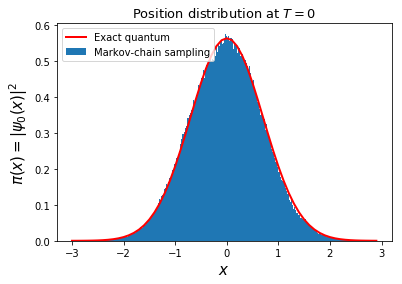

In [139]:
import random, math, pylab
from math import *

def psi_0_sq(x):
    psi = exp(- x ** 2.0 / 2.0) / pi ** (1.0 / 4.0)
    return abs(psi) ** 2.0

xx = 0.0
delta = 0.1
hist_data = []
for k in range(1000000):
    x_new = xx + random.uniform(-delta, delta)
    if random.uniform(0.0, 1.0) < psi_0_sq(x_new) / psi_0_sq(xx): 
        xx = x_new 
        hist_data.append(xx)
    #print x
    
pylab.hist(hist_data, 500, normed = 'True', label='Markov-chain sampling') #histogram of the sample
x = [a / 10.0 for a in range(-30, 30)]
y = [psi_0_sq(a) for a in x]
pylab.plot(x, y, c='red', linewidth=2.0, label='Exact quantum')
pylab.title('Position distribution at $T=0$', fontsize = 13)
pylab.xlabel('$x$', fontsize = 15)
pylab.ylabel('$\pi(x)=|\psi_0(x)|^2$', fontsize = 15)
pylab.legend()
pylab.savefig('plot_T0_prob.png')
pylab.show()

Probability distribution at a finite temperature is given by $e^{-\beta E_n}|\psi_n(x)|^2$, where $\beta=1/T$.

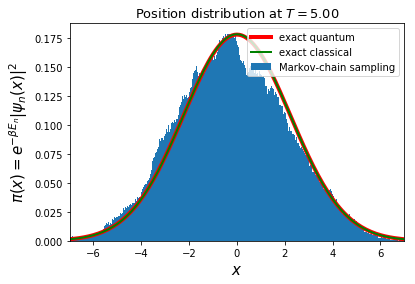

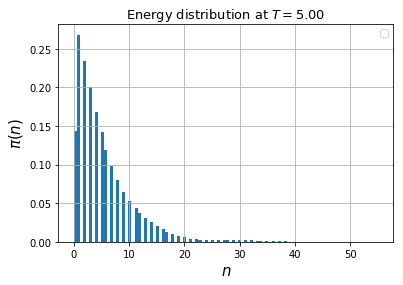

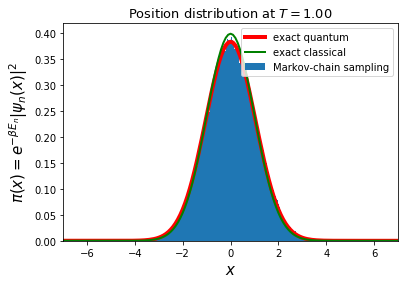

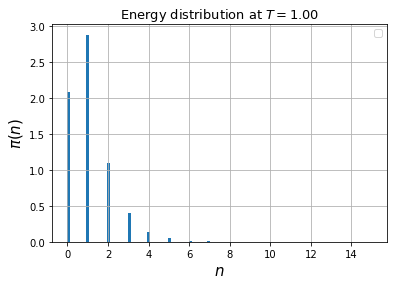

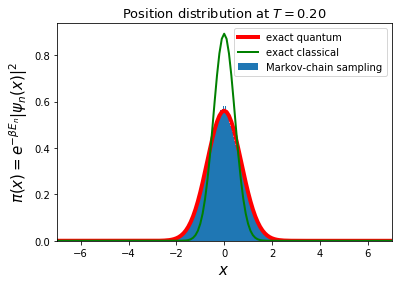

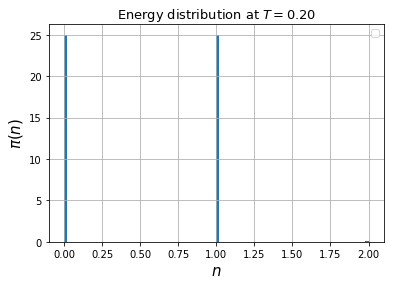

In [4]:
import random, math, pylab
from math import *

# Energy eigenstates of the harmonic oscillator
def psi_n_sq(x, n):
    if n == -1:
        return 0.0
    else:
        psi = [math.exp(-x ** 2 / 2.0) / math.pi ** 0.25]
        psi.append(math.sqrt(2.0) * x * psi[0]) #save the wf's in a vector "psi"
        for k in range(2, n + 1):
            psi.append(math.sqrt(2.0 / k) * x * psi[k - 1] -
                       math.sqrt((k - 1.0) / k) * psi[k - 2]) #Hermite polynomial recursion relations
        return psi[n] ** 2
    
# Energy eigenvalues of the harmonic oscillator
def E(n):
    E = n + 1.0 / 2.0 
    return E


# Markov-chain Monte Carlo algorithm:
def markov_prob(beta, n_trials):
    # Energy move:
    xx = 0.0
    delta = 0.1
    n = 0
    hist_data_n = []
    hist_data_x = []
    for l in range(1000000):
        if xx == 0.0:
            xx += 0.00001 #avoid division by 0
        m = n + random.choice([1,-1]) #take a random energy step
        if m >= 0 and random.uniform(0.0, 1.0) \
                        < psi_n_sq(xx, m) / psi_n_sq(xx, n) * exp(-beta * (E(m) - E(n))): 
            n = m
            hist_data_n.append(n)   
        # Position move:
        x_new = xx + random.uniform(-delta, delta) #take a random position step
        if random.uniform(0.0, 1.0) < psi_n_sq(x_new, n) / psi_n_sq(xx, n): 
            xx = x_new 
            hist_data_x.append(xx)  
    return hist_data_x, hist_data_n
    
#Exact quantum position distribution
def p_quant(x, beta):
    p_q = sqrt(tanh(beta / 2.0) / pi) * exp(- x**2.0 * tanh(beta / 2.0))
    return p_q    
        
#Exact classical position distribution
def p_class(x, beta):
    p_c = sqrt(beta / (2.0 * pi)) * exp(- beta * x**2.0 / 2.0)
    return p_c

#Run the algorithm for different values of temperature:
n_trials = 10000
for beta in [0.2, 1.0, 5.0]:
    B = beta
    T = 1 / beta
    hist_data_x, hist_data_n = markov_prob(beta, n_trials)
    pylab.hist(hist_data_x, 500, normed = 'True', label='Markov-chain sampling') #position histogram of the sample
    x = [a / 10.0 for a in range(-100, 100)]
    y1 = [p_quant(a, beta) for a in x]
    y2 = [p_class(a, beta) for a in x]
    pylab.plot(x, y1, c='red', linewidth=4.0, label='exact quantum')
    pylab.plot(x, y2, c='green', linewidth=2.0, label='exact classical')
    pylab.title('Position distribution at $T=$%.2f' % T, fontsize = 13)
    pylab.xlabel('$x$', fontsize = 15)
    pylab.ylabel('$\pi(x)=e^{-\\beta E_n}|\psi_n(x)|^2$', fontsize = 15)
    pylab.xlim([-7,7])
    pylab.legend()
    pylab.savefig('plot_T_%.2f_prob.png' % T)
    pylab.show()

    pylab.hist(hist_data_n, 100, normed = 'True') #energy histogram of the sample
    pylab.title('Energy distribution at $T=$%.2f' % T, fontsize = 13)
    pylab.xlabel('$n$', fontsize = 15)
    pylab.ylabel('$\pi(n)$', fontsize = 15)
    pylab.legend()
    pylab.grid()
    pylab.savefig('plot_T_%.2f_energy.png' % T)
    pylab.show()

One can see that at high temperatures e.g $T=5$, the position distributions are almost the same. Hence the classical harmonic oscillator is a very good approximation for the quantum harmonic oscillator at high temperatures. The quantum behaviour becomes more prominent at low temperatures (eventually only the ground state is available for a sufficiently low thermal energy), especially below $T=0.2$, as one can see from the above figures.

Here we also got an histogram for the energy ($n$) distribution. The result indicates that the values of $n$ are distributed according to a Poisson distribution?

#### Trotter decomposition (convolution) and path integral monte carlo simulation

On the other hand, we can still obtain the position distributions even if we do not a priori have the analytic stationary states at our disposal. That is, we can approximate the density matrix at high temperatures by the Trotter decomposition and then take advantage of the convolution property to obtain the density matrix at successively reduced temperatures. This is implemented in the following algorithm.

Populating the interactive namespace from numpy and matplotlib


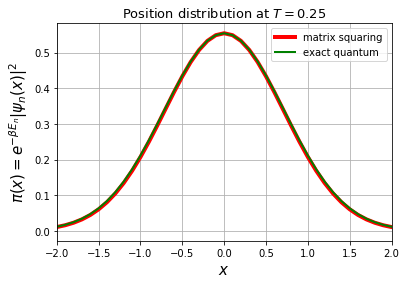

In [1]:
%pylab inline
import math, numpy, pylab
from numpy import *

# Free off-diagonal density matrix:
def rho_free(x, xp, beta):
    return (math.exp(-(x - xp) ** 2 / (2.0 * beta)) /
            math.sqrt(2.0 * math.pi * beta))

# Harmonic density matrix in the Trotter approximation (returns the full matrix):
def rho_harmonic_trotter(grid, beta):
    return numpy.array([[rho_free(x, xp, beta) * \
                         numpy.exp(-0.5 * beta * 0.5 * (x ** 2 + xp ** 2)) \
                         for x in grid] for xp in grid])

# Exact quantum position distribution:
def p_quant(x, beta):
    p_q = sqrt(tanh(beta / 2.0) / pi) * exp(- x**2.0 * tanh(beta / 2.0))
    return p_q

# Construct the position grid:
x_max = 5 #maximum position value
nx = 100 #number of elements on the x grid
dx = 2.0 * x_max / (nx - 1) #position differential
x = [i * dx for i in range(-(nx - 1) / 2, nx / 2 + 1)] #position grid

beta_tmp = 2.0 ** (-5) # initial (low) value of beta (power of 2) (high temperature)
beta = 2.0 ** 2 # actual value of beta (power of 2)

rho = rho_harmonic_trotter(x, beta_tmp) # density matrix at initial (low) beta (Trotter decomp.)

# Reduce the temperature by the convolution property (matrix squaring):
while beta_tmp < beta:
    rho = numpy.dot(rho, rho) #matrix squaring (convolution)
    rho *= dx #also multiply by the differential since we are in position representation
    beta_tmp *= 2.0 #reduce the temperature by a factor of 2
    #print 'beta: %s -> %s' % (beta_tmp / 2.0, beta_tmp)
    
# Output position distribution pi(x) at the final beta onto a file:
Z = sum(rho[j, j] for j in range(nx + 1)) * dx #partition function (to normalise)
pi_of_x = [rho[j, j] / Z for j in range(nx + 1)] #the diagonal element of the density matrix
f = open('data_harm_matrixsquaring_beta' + str(beta) + '.dat', 'w')
for j in range(nx + 1):
    f.write(str(x[j]) + ' ' + str(rho[j, j] / Z) + '\n')
f.close()

# Plot the obtained final position distribution:
T = 1 / beta
x = linspace(-x_max, x_max, nx+1)
y1 = [p_quant(a, beta) for a in x]
pylab.plot(x, pi_of_x, c='red', linewidth=4.0, label='matrix squaring')
pylab.plot(x, y1, c='green', linewidth=2.0, label='exact quantum')
pylab.title('Position distribution at $T=$%.2f' % T, fontsize = 13)
pylab.xlabel('$x$', fontsize = 15)
pylab.xlim([-2,2])
pylab.ylabel('$\pi(x)=e^{-\\beta E_n}|\psi_n(x)|^2$', fontsize = 15)
pylab.legend()
pylab.grid()
pylab.savefig('plot_T_%.2f_prob_matrix_squaring.png' % T)
pylab.show()

Path integral Monte Carlo method is implemented in the following program.

Populating the interactive namespace from numpy and matplotlib


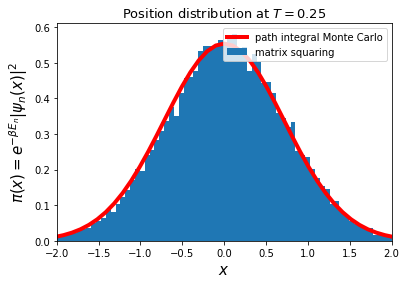

In [5]:
%pylab inline
import math, random, pylab

def rho_free(x, y, beta): # free off-diagonal density matrix
    return math.exp(-(x - y) ** 2 / (2.0 * beta)) 

def read_file(filename):
    list_x = []
    list_y = []
    with open(filename) as f:
        for line in f:
            x, y = line.split()
            list_x.append(float(x))
            list_y.append(float(y))
    f.close()
    return list_x, list_y

beta = 4.0
T = 1 / beta
N = 10                                            # number of slices
dtau = beta / N
delta = 1.0                                       # maximum displacement on one slice
n_steps = 1000000                                 # number of Monte Carlo steps
x = [0.0] * N                                     # initial path
hist_data = []
for step in range(n_steps):
    k = random.randint(0, N - 1)                  # random slice
    knext, kprev = (k + 1) % N, (k - 1) % N       # next/previous slices
    x_new = x[k] + random.uniform(-delta, delta)  # new position at slice k
    old_weight  = (rho_free(x[knext], x[k], dtau) *
                   rho_free(x[k], x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x[k] ** 2))
    new_weight  = (rho_free(x[knext], x_new, dtau) *
                   rho_free(x_new, x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x_new ** 2))
    if random.uniform(0.0, 1.0) < new_weight / old_weight:
        x[k] = x_new
    if step % 10 == 0:
        hist_data.append(x[0])
        
# Figure output:
list_x, list_y = read_file('data_harm_matrixsquaring_beta' + str(beta) + '.dat')
pylab.plot(list_x, list_y, c='red', linewidth=4.0, label='path integral Monte Carlo')
pylab.hist(hist_data, 100, normed = 'True', label='matrix squaring') #histogram of the sample
pylab.title('Position distribution at $T=%.2f$' % T, fontsize = 13)
pylab.xlim(-2.0, 2.0) #restrict the range over which the histogram is shown
pylab.xlabel('$x$', fontsize = 15)
pylab.ylabel('$\pi(x)=e^{-\\beta E_n}|\psi_n(x)|^2$', fontsize = 15)
pylab.legend()
pylab.savefig('plot_T_%.2f_prob_path_int.png' % T)
pylab.show()

### Anharmonic oscillator

Our anharmonic oscillator is described by the potential $V_a(x)=\frac{x^2}{2}+\gamma_{cubic}x^3 + \gamma_{quartic}x^4$, where the coefficients $\gamma_{cubic}, \gamma_{quartic}$ are small. We consider the case $-\gamma_{cubic}=\gamma_{quartic}>0$. 

#### Trotter decomposition

When the cubic and quartic parameters are rather small, the anharmonic potential is similar to the harmonic one. In this case, there exists a perturbative expression for the energy levels $E_n(\gamma_{cubic}, \gamma_{quartic})$ of the anharmonic oscillator. This expression (that is too complicated for us to derive, see e.g. Landau Lifshitz: "Quantum Mechanics (vol 3)", exercise 3 of chap 38) allows us to compute the partition function $\sum_n \exp(-\beta E_n)$ for small $\gamma_{cubic}$ and $\gamma_{quartic}$ (this is the meaning of the word "perturbative"), but it becomes totally wrong at larger values of the parameters.

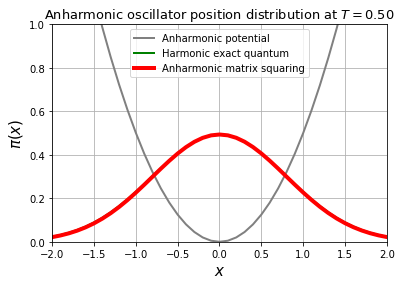

g = 0.001 Perturbative partition function: 0.424365129708 Monte Carlo partition function 0.4243933472931773


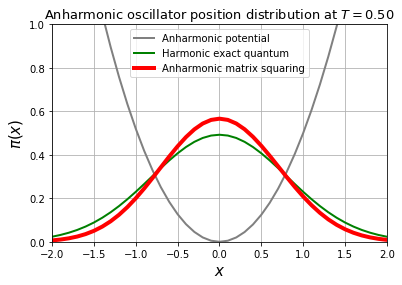

g = 0.01 Perturbative partition function: 0.415052418619 Monte Carlo partition function 0.49819385022243384


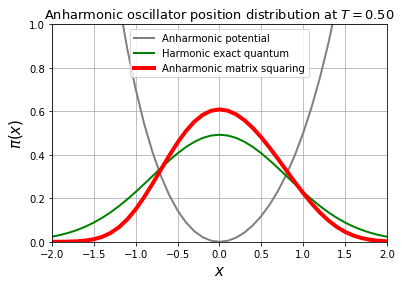

g = 0.1 Perturbative partition function: 0.355151471602 Monte Carlo partition function 0.4632873946110713


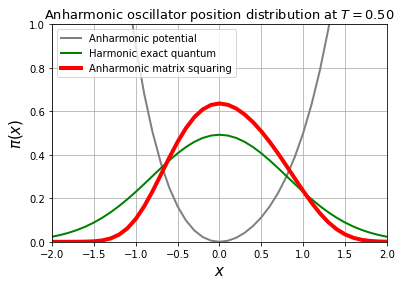

g = 0.2 Perturbative partition function: 0.327758771651 Monte Carlo partition function 0.4434214265268955


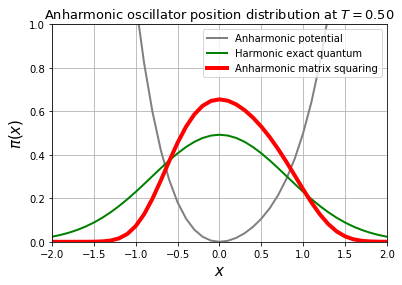

g = 0.3 Perturbative partition function: 0.327846128879 Monte Carlo partition function 0.43064078167185016


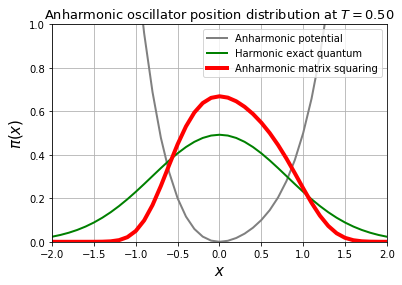

g = 0.4 Perturbative partition function: 0.362552298949 Monte Carlo partition function 0.4215268585206015


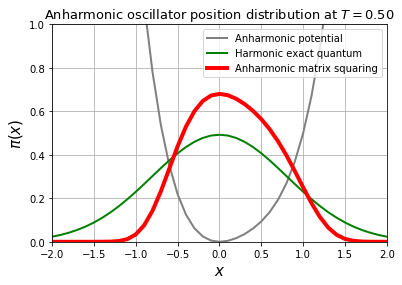

g = 0.5 Perturbative partition function: 3.94705133132e+25 Monte Carlo partition function 0.4146751678730463


In [46]:
import math, numpy, pylab
from numpy import *

# Define the anharmonic (quartic) potential
def V_anharmonic(x, gamma, kappa):
    V = x**2 / 2 + gamma * x**3 + kappa * x**4
    return V

# Free off-diagonal density matrix:
def rho_free(x, xp, beta):
    return (math.exp(-(x - xp) ** 2 / (2.0 * beta)) /
            math.sqrt(2.0 * math.pi * beta))

# Harmonic density matrix in the Trotter approximation (returns the full matrix):
def rho_anharmonic_trotter(grid, beta):
    return numpy.array([[rho_free(x, xp, beta) * \
            numpy.exp(-0.5 * beta * (V_anharmonic(x, -g, g) + V_anharmonic(xp, -g, g))) \
            for x in grid] for xp in grid])

# Exact harmonic oscillator quantum position distribution:
def p_quant(x, beta):
    p_q = sqrt(tanh(beta / 2.0) / pi) * exp(- x**2.0 * tanh(beta / 2.0))
    return p_q

# Perturbative energy levels
def Energy_pert(n, cubic, quartic):
    return n + 0.5 - 15.0 / 4.0 * cubic **2 * (n ** 2 + n + 11.0 / 30.0) \
         + 3.0 / 2.0 * quartic * (n ** 2 + n + 1.0 / 2.0)

# Partition function obtained using perturbative energies
def Z_pert(cubic, quartic, beta, n_max):
    Z = sum(math.exp(-beta * Energy_pert(n, cubic, quartic)) for n in range(n_max + 1))
    return Z

# Construct the position grid:
x_max = 5 #maximum position value
nx = 100 #number of elements on the x grid
dx = 2.0 * x_max / (nx - 1) #position differential
x = [i * dx for i in range(-(nx - 1) / 2, nx / 2 + 1)] #position grid

beta_tmp = 2.0 ** (-5) # initial (low) value of beta (power of 2) (high temperature)
beta = 2.0 ** 1 # actual value of beta (power of 2)

#g = 1.0 #-cubic and quartic coefficient

for g in [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]:
    
    Z_p = Z_pert(-g, g, beta, 15)
    
    rho = rho_anharmonic_trotter(x, beta_tmp) # density matrix at initial (low) beta (Trotter decomp.)

    # Reduce the temperature by the convolution property (matrix squaring):
    while beta_tmp < beta:
        rho = numpy.dot(rho, rho) #matrix squaring (convolution)
        rho *= dx #also multiply by the differential since we are in position representation
        beta_tmp *= 2.0 #reduce the temperature by a factor of 2
        #print 'beta: %s -> %s' % (beta_tmp / 2.0, beta_tmp)

    # Output position distribution pi(x) at the final beta onto a file:
    Z = sum(rho[j, j] for j in range(nx + 1)) * dx #partition function
    pi_of_x = [rho[j, j] / Z for j in range(nx + 1)] #the diagonal element of the density matrix
    f = open('data_anharm_matrixsquaring_beta' + str(beta) + '.dat', 'w')
    for j in range(nx + 1):
        f.write(str(x[j]) + ' ' + str(rho[j, j] / Z) + '\n')
    f.close()

    # Plot the obtained final position distribution:
    T = 1 / beta
    x = linspace(-x_max, x_max, nx+1)
    y2 = [V_anharmonic(a, -g, g) for a in x]
    y1 = [p_quant(a, beta) for a in x]
    pylab.plot(x, y2, c='gray', linewidth=2.0, label='Anharmonic potential')
    pylab.plot(x, y1, c='green', linewidth=2.0, label='Harmonic exact quantum')
    pylab.plot(x, pi_of_x, c='red', linewidth=4.0, label='Anharmonic matrix squaring')
    pylab.ylim(0,1)
    pylab.xlim(-2,2)
    pylab.title('Anharmonic oscillator position distribution at $T=$%.2f' % T, fontsize = 13)
    pylab.xlabel('$x$', fontsize = 15)
    pylab.ylabel('$\pi(x)$', fontsize = 15)
    pylab.legend()
    pylab.grid()
    pylab.savefig('plot_T_%.2f_anharm_g_%.1f_prob_matrix_squaring.png' % (T,g))
    pylab.show()
    print 'g =', g, 'Perturbative partition function:', Z_p, 'Monte Carlo partition function', Z

#### Path integral Monte Carlo

Populating the interactive namespace from numpy and matplotlib


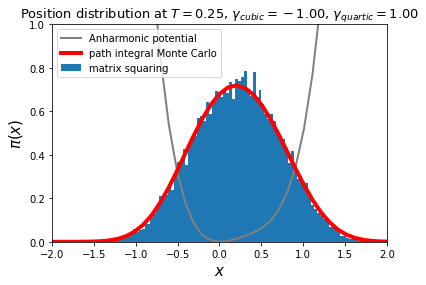

In [15]:
%pylab inline
import math, random, pylab

# Define the anharmonic (quartic) potential
def V_anharmonic(x, gamma, kappa):
    V = x**2 / 2 + gamma * x**3 + kappa * x**4
    return V

def rho_free(x, y, beta): # free off-diagonal density matrix
    return math.exp(-(x - y) ** 2 / (2.0 * beta)) 

def read_file(filename):
    list_x = []
    list_y = []
    with open(filename) as f:
        for line in f:
            x, y = line.split()
            list_x.append(float(x))
            list_y.append(float(y))
    f.close()
    return list_x, list_y

beta = 4.0
g = 1.0 #-cubic and quartic coefficients

T = 1 / beta
N = 16                                            # number of imaginary times slices
dtau = beta / N
delta = 1.0                                       # maximum displacement on one slice
n_steps = 1000000                                 # number of Monte Carlo steps
x = [0.0] * N                                     # initial path
hist_data = []
for step in range(n_steps):
    k = random.randint(0, N - 1)                  # random slice
    knext, kprev = (k + 1) % N, (k - 1) % N       # next/previous slices
    x_new = x[k] + random.uniform(-delta, delta)  # new position at slice k
    old_weight  = (rho_free(x[knext], x[k], dtau) *
                   rho_free(x[k], x[kprev], dtau) *
                   math.exp(-dtau * V_anharmonic(x[k], -g, g)))
    new_weight  = (rho_free(x[knext], x_new, dtau) *
                   rho_free(x_new, x[kprev], dtau) *
                   math.exp(-dtau * V_anharmonic(x_new ,-g, g)))
    if random.uniform(0.0, 1.0) < new_weight / old_weight:
        x[k] = x_new
    if step % 10 == 0:
        hist_data.append(x[0])
        
# Figure output:
list_x, list_y = read_file('data_anharm_matrixsquaring_beta' + str(beta) + '.dat')
v = [V_anharmonic(a, -g, g) for a in list_x]
pylab.plot(list_x, v, c='gray', linewidth=2.0, label='Anharmonic potential')
pylab.plot(list_x, list_y, c='red', linewidth=4.0, label='path integral Monte Carlo')
pylab.hist(hist_data, 100, normed = 'True', label='matrix squaring') #histogram of the sample
pylab.ylim(0,1)
pylab.xlim(-2,2)
pylab.title('Position distribution at $T=%.2f$, $\gamma_{cubic}=%.2f$, $\gamma_{quartic}=%.2f$' % (T,-g,g), fontsize = 13)
pylab.xlim(-2.0, 2.0) #restrict the range over which the histogram is shown
pylab.xlabel('$x$', fontsize = 15)
pylab.ylabel('$\pi(x)$', fontsize = 15)
pylab.legend()
pylab.savefig('plot_T_%.2f_anharm_g_%.1f_prob_path_int.png' % (T,g))
pylab.show()